**MonteCarloSimulation**

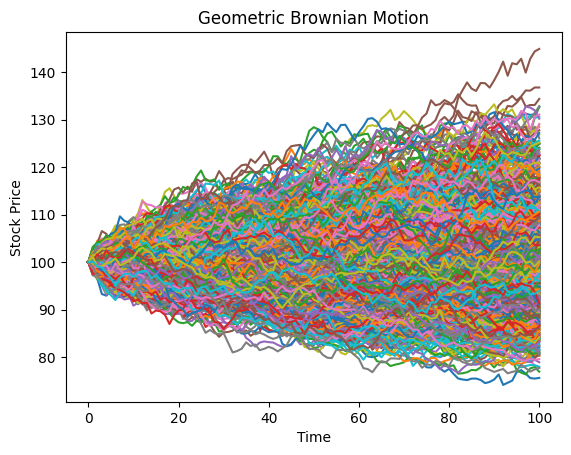

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from Misc.MonteCarloSimulator import MonteCarloSimulator

S0=100
K=100
T=100/365
r=0.05
q=0
sigma=0.2
M=1000
N=100
dt = T/N
np.random.seed(2017142101)
S = MonteCarloSimulator(S0,K,T,r,sigma,N,M)
S_plot=np.transpose(S)

plt.xlabel("Time")
plt.ylabel("Stock Price")
plt.title("Geometric Brownian Motion")
plt.plot(S_plot);
plt.savefig('MonteCarloSimulation.png')




Black-Scholes Model

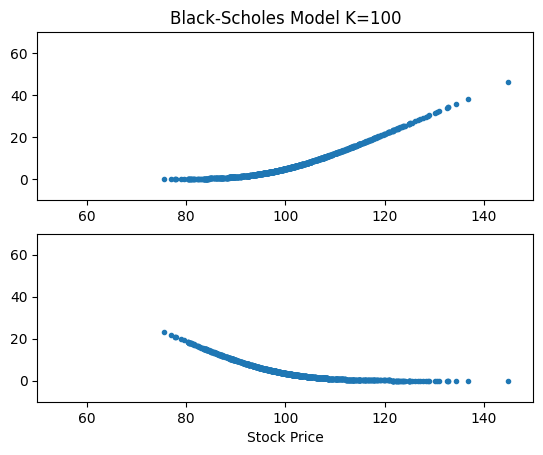

In [2]:
from Options.black_scholes import bscall, bsput
import matplotlib.pylab as pylab
cost_BScall=[]
cost_BSput=[]
cost_BScall,d1=bscall(S,K,T,r,sigma)
cost_BSput =bsput(S,K,T,r,sigma)
K=100
plt.subplot(2,1,1)
plt.scatter(S[:,-1],cost_BScall[:,-1],marker=".")
plt.title("Black-Scholes Model K=100")
plt.ylim([-10,70]);
plt.xlim([50,150])
plt.subplot(2,1,2)
plt.scatter(S[:,-1],cost_BSput[:,-1],marker=".")
plt.xlabel("Stock Price")
plt.ylim([-10,70]);
plt.xlim([50,150])
plt.savefig('BS_K100.png')


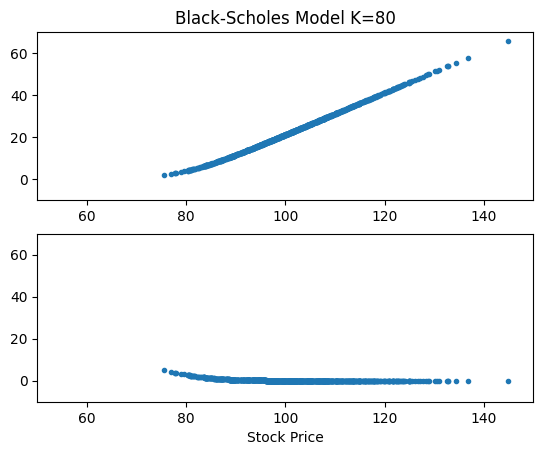

In [3]:
K=80
cost_BScall=[]
cost_BSput=[]
cost_BScall,d1=bscall(S,K,T,r,sigma)
cost_BSput =bsput(S,K,T,r,sigma)
plt.subplot(2,1,1)
plt.scatter(S[:,-1],cost_BScall[:,-1],marker=".")
plt.title("Black-Scholes Model K=80")
plt.ylim([-10,70]);
plt.xlim([50,150])
plt.subplot(2,1,2)
plt.scatter(S[:,-1],cost_BSput[:,-1],marker=".")
plt.xlabel("Stock Price")
plt.ylim([-10,70]);
plt.xlim([50,150])
plt.savefig('BS_K80.png')

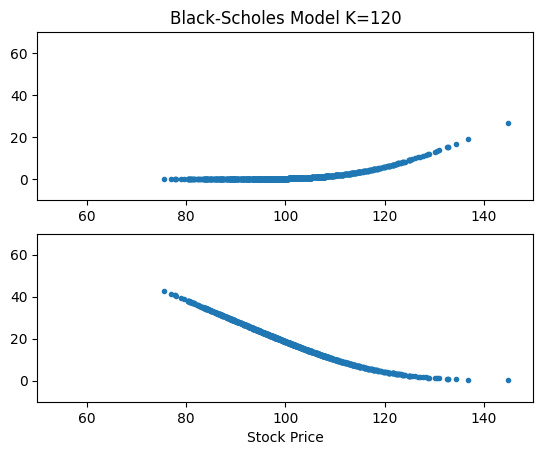

In [4]:
K=120
cost_BScall=[]
cost_BSput=[]
cost_BScall,d1=bscall(S,K,T,r,sigma)
cost_BSput =bsput(S,K,T,r,sigma)
plt.subplot(2,1,1)
plt.scatter(S[:,-1],cost_BScall[:,-1],marker=".")
plt.title("Black-Scholes Model K=120")
plt.ylim([-10,70]);
plt.xlim([50,150])
plt.subplot(2,1,2)
plt.scatter(S[:,-1],cost_BSput[:,-1],marker=".")
plt.xlabel("Stock Price")
plt.ylim([-10,70]);
plt.xlim([50,150])
plt.savefig('BS_K120.png')

Lookback option with fixed strike by MC

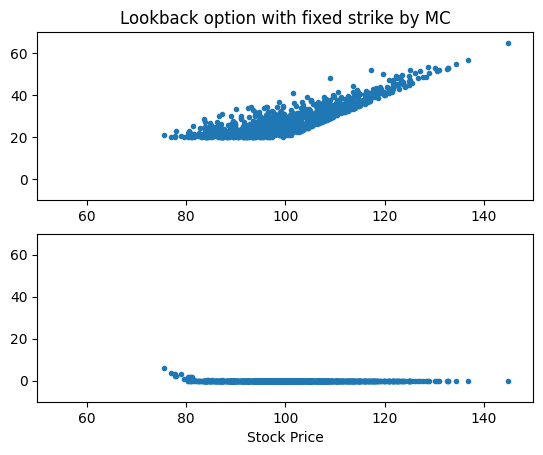

In [5]:
fixed_LBcall=np.zeros([M,N])
fixed_LBput=np.zeros([M,N])
K=80
for i in range(M):
    for j in range(N):
        S_max= np.max(S[i,:])
        S_min= np.min(S[i,:])
        fixed_LBcall[i,j]=np.max([S_max-K,0])
        fixed_LBput[i,j]=np.max([K-S_min,0])


plt.subplot(2,1,1)
plt.scatter(S[:,-1],fixed_LBcall[:,-1],marker=".")
plt.title("Lookback option with fixed strike by MC")
plt.ylim([-10,70])
plt.xlim([50,150])
plt.subplot(2,1,2)
plt.scatter(S[:,-1],fixed_LBput[:,-1],marker=".")
plt.xlabel("Stock Price");
plt.ylim([-10,70]);
plt.xlim([50,150])
plt.savefig('LB_Fixed_MC_K80.png')

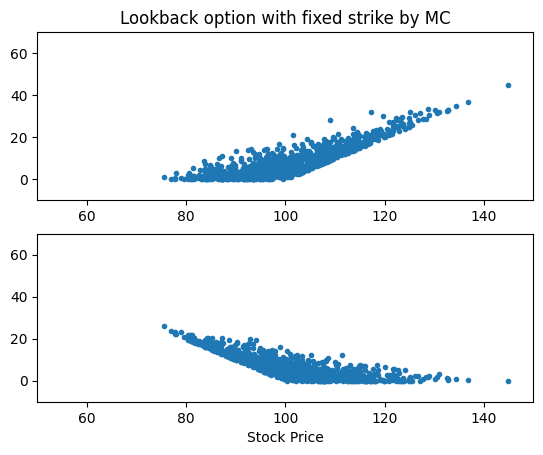

In [6]:
fixed_LBcall=np.zeros([M,N])
fixed_LBput=np.zeros([M,N])
K=100
for i in range(M):
    for j in range(N):
        S_max= np.max(S[i,:])
        S_min= np.min(S[i,:])
        fixed_LBcall[i,j]=np.max([S_max-K,0])
        fixed_LBput[i,j]=np.max([K-S_min,0])


plt.subplot(2,1,1)
plt.scatter(S[:,-1],fixed_LBcall[:,-1],marker=".")
plt.title("Lookback option with fixed strike by MC")
plt.ylim([-10,70])
plt.xlim([50,150])
plt.subplot(2,1,2)
plt.scatter(S[:,-1],fixed_LBput[:,-1],marker=".")
plt.xlabel("Stock Price");
plt.ylim([-10,70]);
plt.xlim([50,150])
plt.savefig('LB_Fixed_MC_K100.png')

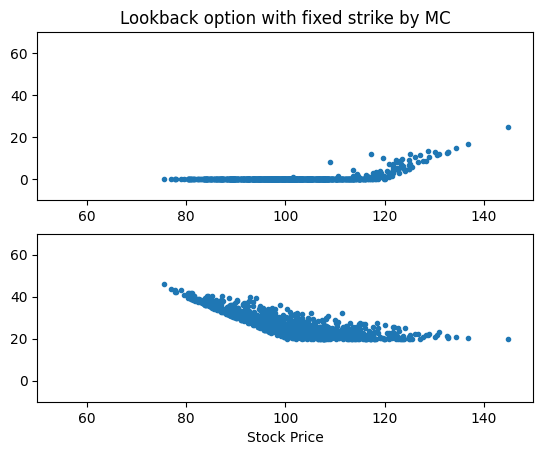

In [7]:
fixed_LBcall=np.zeros([M,N])
fixed_LBput=np.zeros([M,N])
K=120
for i in range(M):
    for j in range(N):
        S_max= np.max(S[i,:])
        S_min= np.min(S[i,:])
        fixed_LBcall[i,j]=np.max([S_max-K,0])
        fixed_LBput[i,j]=np.max([K-S_min,0])


plt.subplot(2,1,1)
plt.scatter(S[:,-1],fixed_LBcall[:,-1],marker=".")
plt.title("Lookback option with fixed strike by MC")
plt.ylim([-10,70])
plt.xlim([50,150])
plt.subplot(2,1,2)
plt.scatter(S[:,-1],fixed_LBput[:,-1],marker=".")
plt.xlabel("Stock Price");
plt.ylim([-10,70]);
plt.xlim([50,150])
plt.savefig('LB_Fixed_MC_K120.png')

Lookback option with floating strike by MC

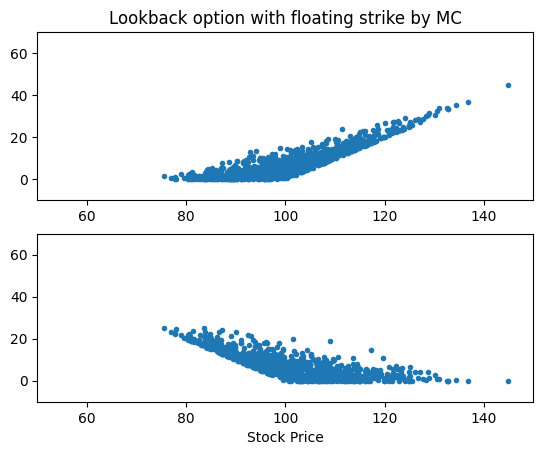

In [8]:
float_LBcall=np.zeros([M,N])
float_LBput=np.zeros([M,N])
K=80
for i in range(M):
    temp=S[i,:]
    for j in range(N):
        S_max= np.max(temp[0:j+1])
        S_min= np.min(temp[0:j+1])
        float_LBput[i,j]=np.max([S_max-S[i,-1],0]) 
        float_LBcall[i,j]=np.max([S[i,-1]-S_min,0])
        

plt.subplot(2,1,1)
plt.scatter(S[:,-1],float_LBcall[:,-1],marker=".")
plt.title("Lookback option with floating strike by MC")
plt.ylim([-10,70]);
plt.xlim([50,150])
plt.subplot(2,1,2)
plt.scatter(S[:,-1],float_LBput[:,-1],marker=".")
plt.xlabel("Stock Price");
plt.ylim([-10,70]);
plt.xlim([50,150])
plt.savefig('LB_Floating_MC_K80.png')
 

In [9]:
# float_LBcall=np.zeros([M,N])
# float_LBput=np.zeros([M,N])
# K=100
# for i in range(M):
#     temp=S[i,:]
#     for j in range(N):
#         S_max= np.max(temp[0:j+1])
#         S_min= np.min(temp[0:j+1])
#         float_LBput[i,j]=np.max([S_max-S[i,-1],0]) 
#         float_LBcall[i,j]=np.max([S[i,-1]-S_min,0])
        

# plt.subplot(2,1,1)
# plt.scatter(S[:,-1],float_LBcall[:,-1],marker=".")
# plt.title("Lookback option with floating strike by MC")
# plt.ylim([-10,70]);
# plt.xlim([50,150])
# plt.subplot(2,1,2)
# plt.scatter(S[:,-1],float_LBput[:,-1],marker=".")
# plt.xlabel("Stock Price");
# plt.ylim([-10,70]);
# plt.xlim([50,150])
# plt.savefig('LB_Floating_MC_K100.png')
 

In [10]:
# float_LBcall=np.zeros([M,N])
# float_LBput=np.zeros([M,N])
# K=120
# for i in range(M):
#     temp=S[i,:]
#     for j in range(N):
#         S_max= np.max(temp[0:j+1])
#         S_min= np.min(temp[0:j+1])
#         float_LBput[i,j]=np.max([S_max-S[i,-1],0]) 
#         float_LBcall[i,j]=np.max([S[i,-1]-S_min,0])
        

# plt.subplot(2,1,1)
# plt.scatter(S[:,-1],float_LBcall[:,-1],marker=".")
# plt.title("Lookback option with floating strike by MC")
# plt.ylim([-10,70]);
# plt.xlim([50,150])
# plt.subplot(2,1,2)
# plt.scatter(S[:,-1],float_LBput[:,-1],marker=".")
# plt.xlabel("Stock Price");
# plt.ylim([-10,70]);
# plt.xlim([50,150])
# plt.savefig('LB_Floating_MC_K120.png')
 

Lookback option by formula

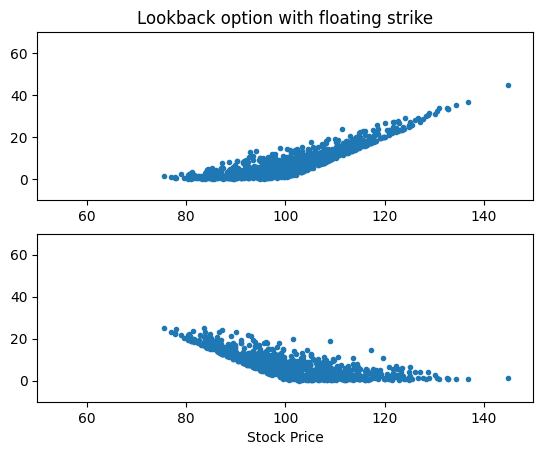

In [11]:
from Options.Look_back2 import lbcall, lbput
K=80
cost_LBcall=[]
cost_LBput=[]
S_max=np.max(S,axis=1,keepdims=True)
S_min=np.min(S,axis=1,keepdims=True)
    
cost_LBcall, a1=lbcall(S,S_min,dt,r,sigma,q=0)
cost_LBput=lbput(S,S_max,dt,r,sigma,q=0)

plt.subplot(2,1,1)
plt.scatter(S[:,-1],cost_LBcall[:,-1],marker=".")
plt.title("Lookback option with floating strike")
plt.ylim([-10,70]);
plt.xlim([50,150])
plt.subplot(2,1,2)
plt.scatter(S[:,-1],cost_LBput[:,-1],marker=".")
plt.xlabel("Stock Price");
plt.ylim([-10,70]);
plt.xlim([50,150])
plt.savefig('LB_Floating_MC_K80.png')


In [12]:
# from Options.Look_back2 import lbcall, lbput
# K=100
# cost_LBcall=[]
# cost_LBput=[]
# S_max=np.max(S,axis=1,keepdims=True)
# S_min=np.min(S,axis=1,keepdims=True)
    
# cost_LBcall, a1=lbcall(S,S_min,dt,r,sigma,q=0)
# cost_LBput=lbput(S,S_max,dt,r,sigma,q=0)

# plt.subplot(2,1,1)
# plt.scatter(S[:,-1],cost_LBcall[:,-1],marker=".")
# plt.title("Lookback option with floating strike")
# plt.ylim([-10,70]);
# plt.xlim([50,150])
# plt.subplot(2,1,2)
# plt.scatter(S[:,-1],cost_LBput[:,-1],marker=".")
# plt.xlabel("Stock Price");
# plt.ylim([-10,70]);
# plt.xlim([50,150])
# plt.savefig('LB_Floating_MC_K100.png')

In [13]:
# from Options.Look_back2 import lbcall, lbput
# K=120
# cost_LBcall=[]
# cost_LBput=[]
# S_max=np.max(S,axis=1,keepdims=True)
# S_min=np.min(S,axis=1,keepdims=True)
    
# cost_LBcall, a1=lbcall(S,S_min,dt,r,sigma,q=0)
# cost_LBput=lbput(S,S_max,dt,r,sigma,q=0)

# plt.subplot(2,1,1)
# plt.scatter(S[:,-1],cost_LBcall[:,-1],marker=".")
# plt.title("Lookback option with floating strike")
# plt.ylim([-10,70]);
# plt.xlim([50,150])
# plt.subplot(2,1,2)
# plt.scatter(S[:,-1],cost_LBput[:,-1],marker=".")
# plt.xlabel("Stock Price");
# plt.ylim([-10,70]);
# plt.xlim([50,150])
# plt.savefig('LB_Floating_MC_K120.png')

In [14]:
# np.mean(cost_LBcall[:,0:99]-float_LBcall[:,0:99])

Delta hedge?

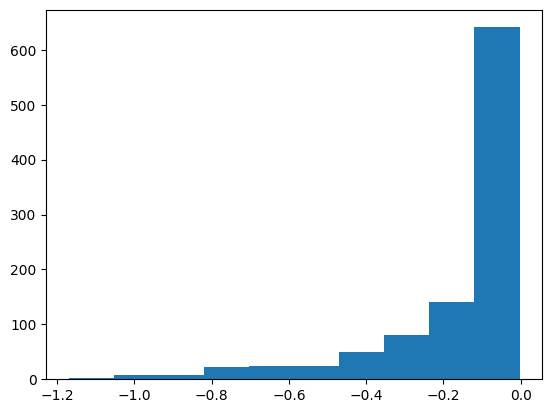

In [25]:
from scipy.stats import norm
delta= norm.cdf(d1)
K=1
a=[]
for i in range(M):
    cost=0
    hedge=0
    for j in range(N):
        cost = cost + (hedge-delta[i,j]) * S[i,j]/100
        hedge=delta[i,j]
        # cost = cost + (hedge) * S[i,j]
    # if S[i,N] > K:
    #     cost = cost + (hedge-1)*S[i,N] + K
    # else:
    #     cost = cost + (hedge-0)*S[i,N]
    a.append(cost)

plt.hist(a);


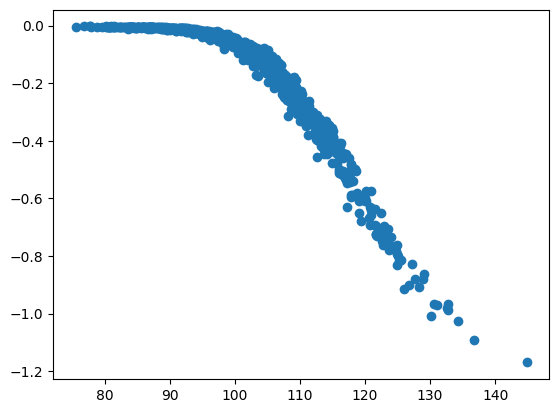

In [26]:
plt.scatter(S[:,-1],a);

Deep hedge of Lookback option

In [16]:
todaytrial = "1221"
dailytrial = 1

In [17]:
import tensorflow as tf
import os
todaytrial = "1221"
dailytrial = 1
my_input=[]
premium=tf.keras.layers.Input(shape=(1,),name="premium")
hedge_cost = tf.keras.layers.Input(shape=(1,), name='hedge_cost')
price = tf.keras.layers.Input(shape=(1,), name="price")


my_input = my_input + [premium] + [hedge_cost] + [price]

for j in range(N):
    
    delta2 = tf.keras.layers.BatchNormalization()(price)
    delta2 = tf.keras.layers.Dense(32, activation='leaky_relu')(delta2)
    
    delta = tf.keras.layers.BatchNormalization()(price)
    delta = tf.keras.layers.Dense(32, activation='tanh')(price)
    delta = tf.keras.layers.BatchNormalization()(delta)
    delta = tf.keras.layers.Dense(32, activation='leaky_relu')(delta)
    delta = tf.keras.layers.Dense(32, activation='leaky_relu')(delta)
    delta = tf.keras.layers.Add(name='1_skip_connection_'+str(j))([delta, delta2])
    
    delta2 = delta
    delta = tf.keras.layers.BatchNormalization()(price)
    delta = tf.keras.layers.Dense(32, activation='tanh')(price)
    delta = tf.keras.layers.BatchNormalization()(delta)
    delta = tf.keras.layers.Dense(32, activation='leaky_relu')(delta)
    delta = tf.keras.layers.Dense(32, activation='leaky_relu')(delta)
    delta = tf.keras.layers.Add(name='2_skip_connection_'+str(j))([delta, delta2])
    
    delta = tf.keras.layers.Dropout(0.5)(delta)
    delta = tf.keras.layers.Dense(1)(delta)


    new_price = tf.keras.layers.Input(shape=(1,), name='S'+str(j+1))
    my_input = my_input + [new_price]

    price_inc = tf.keras.layers.Subtract(name='price_inc_'+str(j))([price, new_price])
    cost = tf.keras.layers.Multiply(name="stock_"+str(j))([delta, price_inc])
    hedge_cost = tf.keras.layers.Add(name='cost_'+str(j))([hedge_cost, cost])
    #info_set = tf.keras.layers.Concatenate()([price, new_price])
    price = new_price
    
payoff = tf.keras.layers.Lambda(lambda x : tf.math.maximum(x-K,0), name='payoff')(price)
cum_cost = tf.keras.layers.Add(name="hedge_cost_plus_payoff")([hedge_cost, payoff])
cum_cost = tf.keras.layers.Subtract(name="cum_cost-premium")([cum_cost, premium])

model = tf.keras.Model(inputs=my_input, outputs=cum_cost)

ImportError: cannot import name 'experimental_functions_run_eagerly' from 'tensorflow.python.eager.def_function' (c:\Users\mudd\AppData\Local\Programs\Python\Python310\lib\site-packages\tensorflow\python\eager\def_function.py)

In [ ]:
import tensorflow as tf

print(tf.test.is_built_with_cuda())

print(tf.config.list_physical_devices('GPU'))

True
[]


In [ ]:
K=100
from Options.Look_back import lbcall_premium
from tensorflow import keras
dirname = f'{todaytrial}/t{dailytrial}'
os.makedirs(f'models/{dirname}', exist_ok=True)
os.makedirs(f'results/{dirname}', exist_ok=True)
# from tensorflow.keras import layers
premium = lbcall_premium(S0,S0,T,r,sigma,q=0)* np.ones([M,1])
cost = np.zeros([M,1])
price = [S[:,i].reshape(M,1) for i in range(N+1)]
x = [premium]+[cost]+[price]
y = np.zeros([M,1])

lr_schedule = keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=1e-3,
    decay_steps=80,
    decay_rate=0.1)
opt= keras.optimizers.Adam(learning_rate=lr_schedule)

model.compile(loss='mse', optimizer=opt)
# with tf.device('/device:GPU:1'): 
#     hist = model.fit(x,y, batch_size=32, epochs=100, verbose=2, validation_split=0.25)
hist = model.fit(x,y, batch_size=32, epochs=100, verbose=2, validation_split=0.25)
model.save(f'./models/{dirname}/')
dailytrial+=1

deephedgeResult

In [ ]:
plt.plot(hist.history['loss'])
plt.show()
plt.savefig(f"results/{dirname}/loss_curve.png", dpi=300)

plt.hist(model.predict(x), bins=30)
plt.show()
plt.savefig(f"results/{dirname}/histogram.png", dpi=300)

plt.plot(S[:,-1], model.predict(x), marker = ".", linestyle='none')
plt.show()
plt.savefig(f"results/{dirname}/predict.png", dpi=300)